In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from scipy import stats
from scipy.stats import beta
from scipy.stats import norm
from scipy import optimize as opt
from scipy.stats import beta, uniform
from scipy.stats import norm, multivariate_normal

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
np.random.seed(123)

In [6]:
mu = np.array([1, 2])
cov = np.array([[1.0, 0.8],[0.7, 1.0]])

In [7]:
x = np.arange(-2, 4, 0.01)
y = np.arange(-1, 5, 0.01)
X, Y = np.meshgrid(x,y)
pos = np.zeros([X.shape[0], X.shape[1],2])
pos[:,:,0] = X
pos[:,:,1] = Y

Text(0,0.5,'$x_{2}$')

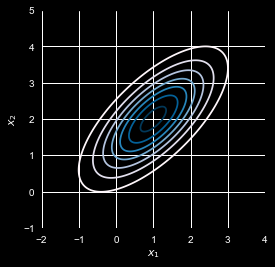

In [12]:
rv = multivariate_normal(mu, cov)
plt.figure(figsize=(4,4))
plt.contour(X, Y, rv.pdf(pos), cmap="PuBu")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")

In [16]:
dataset2 = np.random.multivariate_normal(mu,cov,1000)
df = pd.DataFrame(dataset2, columns=['X','Y'])

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


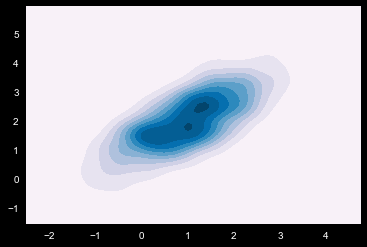

In [19]:
sns.kdeplot(df, cmap='PuBu', shade=True)

In [20]:
NMCS = 500
sigma12 = cov[1,0]
sigma1 = cov[0,0] ** 0.5
sigma2 = cov[1,1] ** 0.5
rho = sigma12 / (sigma1*sigma2)
z1 = 0.0
z2 = 0.0
z1_mcs = [z1]
z2_mcs = [z2]
for i in range(NMCS):
    #f(z1|z2)
    z1 = norm.rvs(loc=rho*z2, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
    #f(z2|z1)
    z2 = norm.rvs(loc=rho*z1, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
df1 = pd.DataFrame(mu[0] + np.array(z1_mcs) * sigma1)    
df2 = pd.DataFrame(mu[1] + np.array(z2_mcs) * sigma2)    

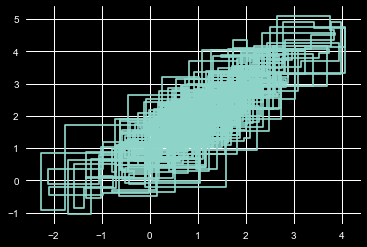

In [21]:
plt.plot(df1[0],df2[0])